<a href="https://colab.research.google.com/github/shaimathamer/Deep_Learning_Agriclture/blob/main/Deep_Learning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import all libraries for the projects 

In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt


Connect to Drive

In [2]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


Use Tensor FLOW Data set to navigate the data.

In [3]:
path='/content/gdrive/MyDrive/plant'
import pathlib

data_dir = path
data_dir = pathlib.Path(data_dir)

In [4]:
image_size=256
CHANNELS=3
BATCH_SIZE=32


Read Dataset

In [5]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(data_dir,shuffle=True,image_size=(256,256),batch_size=32)

Found 2152 files belonging to 3 classes.


1- Anlysis Data

In [6]:
classes=dataset.class_names
classes

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [7]:
for imag_batch,label_batch in dataset.take(1):
  print(imag_batch.shape)
  print(imag_batch[0])
  


(32, 256, 256, 3)
tf.Tensor(
[[[180. 182. 195.]
  [179. 181. 194.]
  [180. 182. 195.]
  ...
  [150. 154. 157.]
  [146. 150. 153.]
  [144. 148. 151.]]

 [[180. 182. 195.]
  [181. 183. 196.]
  [182. 184. 197.]
  ...
  [ 28.  32.  35.]
  [ 34.  38.  41.]
  [ 40.  44.  47.]]

 [[183. 185. 198.]
  [184. 186. 199.]
  [186. 188. 201.]
  ...
  [ 23.  27.  30.]
  [ 20.  24.  27.]
  [ 16.  20.  23.]]

 ...

 [[195. 194. 202.]
  [195. 194. 202.]
  [198. 197. 205.]
  ...
  [181. 179. 184.]
  [182. 180. 185.]
  [185. 183. 188.]]

 [[192. 191. 199.]
  [192. 191. 199.]
  [196. 195. 203.]
  ...
  [162. 160. 165.]
  [188. 186. 191.]
  [183. 181. 186.]]

 [[193. 192. 200.]
  [192. 191. 199.]
  [196. 195. 203.]
  ...
  [190. 188. 193.]
  [191. 189. 194.]
  [190. 188. 193.]]], shape=(256, 256, 3), dtype=float32)


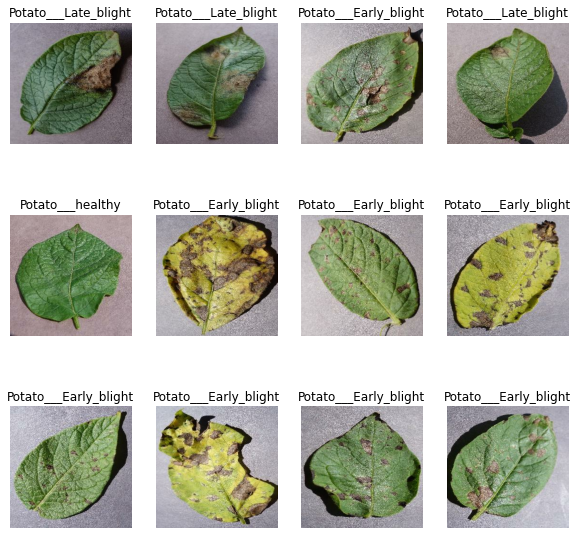

In [8]:
plt.figure(figsize=(10,10))
for imag_batch,label_batch in dataset.take(1):
  for i in range(12):
    ax=plt.subplot(3,4,i+1)
    plt.imshow(imag_batch[i].numpy().astype('uint8'))
    plt.title(classes[label_batch[i]])
    plt.axis('off')


  

Divide the dataset to 80% training .10% test.10%validation


In [9]:
train_size=0.8
size=len(dataset)*train_size
size=int(size)

In [10]:
train_dataset=dataset.take(size)

In [11]:
valid_dataset=dataset.skip(size)
test_dataset=valid_dataset.take(8)
print(len(test_dataset))
valid_dataset=valid_dataset.skip(8)
print(len(valid_dataset))

8
6


In [12]:
#train_dataset=train_dataset.cache().shuffle(1000).prefetch(buffer_batch=tf.data.AUTOTUNE())
#valid_dataset=valid_dataset.cache().shuffle(1000).prefetch(buffer_batch=tf.data.AUTOTUNE())
#test_dataset=test_dataset.cache().shuffle(1000).prefetch(buffer_batch=tf.data.AUTOTUNE())

2-PreProcessing_scaling 

In [13]:
rescal_layer=tf.keras.Sequential([layers.experimental.preprocessing.Rescaling(1/25),
                     layers.experimental.preprocessing.Resizing(image_size,image_size)

])

In [14]:
data_agumation=tf.keras.Sequential([layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
                                    layers.experimental.preprocessing.RandomRotation(0.2)

])

3-Building Model

In [15]:
input_shape = (BATCH_SIZE, image_size, image_size, CHANNELS)
class_num=3
model=models.Sequential([rescal_layer,data_agumation,
                         layers.Conv2D(32,(3,3), activation='relu',input_shape=input_shape),
                         layers.MaxPooling2D((2,2)),
                         layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
                         layers.MaxPooling2D((2,2)),
                         layers.Conv2D(32,(3,3), activation='relu',input_shape=input_shape),
                         layers.MaxPooling2D((2,2)),
                         layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
                         layers.MaxPooling2D((2,2)),
                         layers.Flatten(),layers.Dense(64,activation='relu'),
                         layers.Dense(class_num, activation='softmax'),
                         ])
model.build(input_shape=input_shape)                        

In [16]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (32, 256, 256, 3)         0         
_________________________________________________________________
sequential_1 (Sequential)    (32, 256, 256, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (32, 254, 254, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (32, 127, 127, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (32, 125, 125, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (32, 62, 62, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (32, 60, 60, 32)         

In [17]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])

In [18]:
history = model.fit(
    train_dataset,
    batch_size=BATCH_SIZE,
    validation_data=valid_dataset,
    verbose=1,
    epochs=50,
)

Epoch 1/50
54/54 [==============================] - 219s 3s/step - loss: 0.6675 - accuracy: 0.6973 - val_loss: 1.1996 - val_accuracy: 0.5893
Epoch 2/50
54/54 [==============================] - 11s 199ms/step - loss: 0.3695 - accuracy: 0.8617 - val_loss: 0.3720 - val_accuracy: 0.8393
Epoch 3/50
54/54 [==============================] - 11s 198ms/step - loss: 0.2639 - accuracy: 0.8866 - val_loss: 0.2011 - val_accuracy: 0.9226
Epoch 4/50
54/54 [==============================] - 11s 198ms/step - loss: 0.2017 - accuracy: 0.9259 - val_loss: 0.1616 - val_accuracy: 0.9286
Epoch 5/50
54/54 [==============================] - 11s 196ms/step - loss: 0.2200 - accuracy: 0.9155 - val_loss: 0.1878 - val_accuracy: 0.9167
Epoch 6/50
54/54 [==============================] - 11s 195ms/step - loss: 0.1539 - accuracy: 0.9439 - val_loss: 0.2397 - val_accuracy: 0.9226
Epoch 7/50
54/54 [==============================] - 11s 201ms/step - loss: 0.1564 - accuracy: 0.9433 - val_loss: 0.1214 - val_accuracy: 0.9405
E

4-Evaluate Model

In [19]:
model.evaluate(test_dataset)

8/8 [==============================] - 5s 74ms/step - loss: 0.0216 - accuracy: 0.9922


[0.02158172056078911, 0.9921875]

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

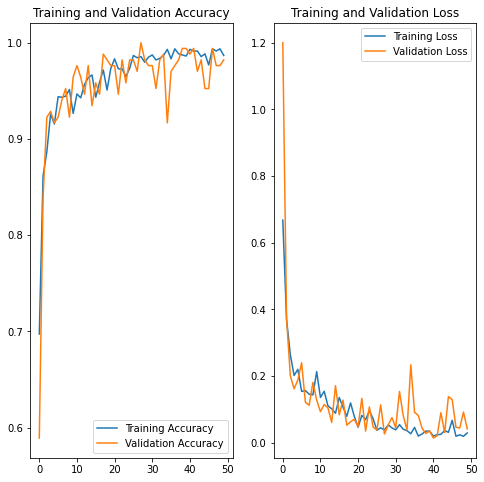

In [23]:
epochs=50
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(epochs), acc, label='Training Accuracy')
plt.plot(range(epochs), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(epochs), loss, label='Training Loss')
plt.plot(range(epochs), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Potato___Late_blight
predicted label: Potato___Late_blight


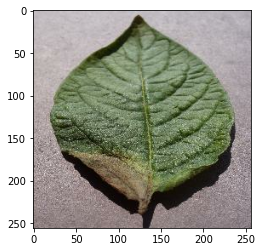

In [27]:
import numpy as np
for images_batch, labels_batch in test_dataset.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",classes[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",classes[np.argmax(batch_prediction[0])])

In [28]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = classes[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

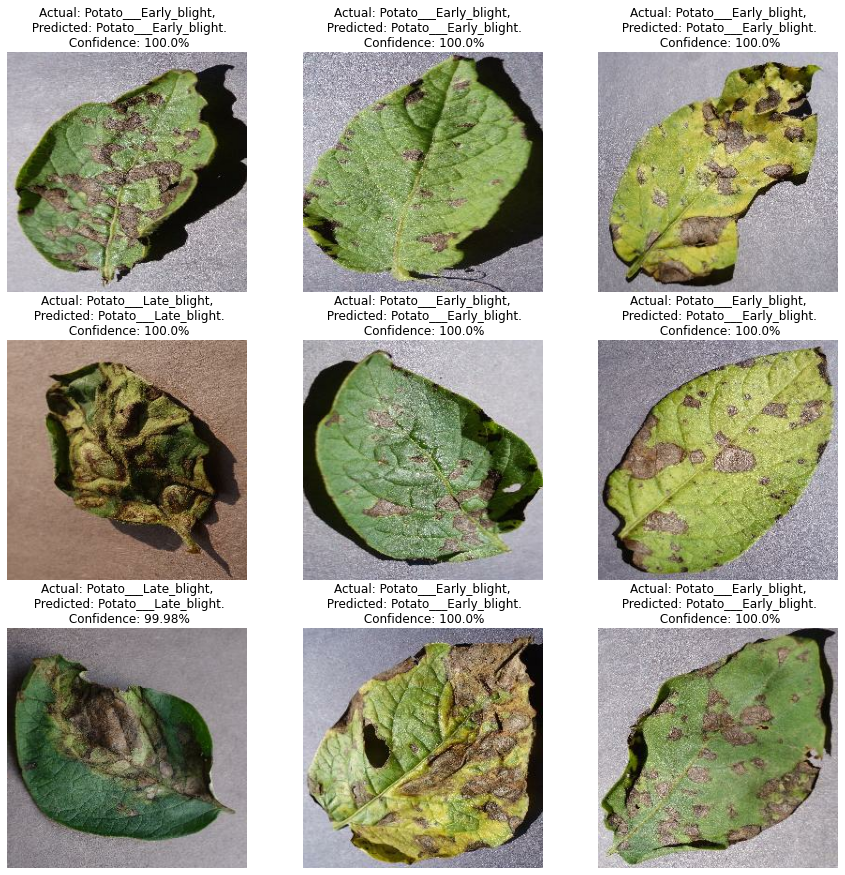

In [30]:
plt.figure(figsize=(15, 15))
for images, labels in test_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = classes[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

5-save Model

In [32]:
#import os
#model_version=max([int(i) for i in os.listdir("../models") + [0]])+1
#model.save(f"../models/{model_version}")

# Save the entire model as a SavedModel.
!mkdir -p saved_model
model.save('saved_model/my_model') 

INFO:tensorflow:Assets written to: saved_model/my_model/assets
